In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

: 

In [590]:
#Load the Dataset
job_data = pd.read_csv('dice_com-job_us_sample.csv')
job_data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [591]:
job_data.shape

(22000, 12)

In [592]:
job_data.dtypes

advertiserurl               object
company                     object
employmenttype_jobstatus    object
jobdescription              object
jobid                       object
joblocation_address         object
jobtitle                    object
postdate                    object
shift                       object
site_name                   object
skills                      object
uniq_id                     object
dtype: object

In [593]:
job_data.columns

Index(['advertiserurl', 'company', 'employmenttype_jobstatus',
       'jobdescription', 'jobid', 'joblocation_address', 'jobtitle',
       'postdate', 'shift', 'site_name', 'skills', 'uniq_id'],
      dtype='object')

In [594]:
# get the number of missing data points per column : Inspect Missing Values
missing_values_count = job_data.isnull().sum()
missing_values_count[0:10]

advertiserurl                   0
company                        50
employmenttype_jobstatus      230
jobdescription                  0
jobid                           0
joblocation_address             3
jobtitle                        0
postdate                        0
shift                         357
site_name                   18510
dtype: int64

In [595]:
# how many total missing values do we have?
total_cells = np.product(job_data.shape)
total_missing = missing_values_count.sum()
print(print("Missing values per column:\n", total_missing))

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

Missing values per column:
 19193
None
7.270075757575757


In [596]:
#Clean Columns with Too Much Missing Data
job_data_cleaned = job_data.copy()
# drop only columns with too many missing values
job_data_cleaned = job_data.drop(['shift', 'advertiserurl', 'site_name', 'jobid','uniq_id'], axis=1)
job_data_cleaned.head()

,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,postdate,skills
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,SEE BELOW
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,1 week ago,"linux/unix, network monitoring, incident respo..."
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,2 weeks ago,"Enterprise Solutions Architecture, business in..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Please see job description
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,48 minutes ago,"Configuration Management, Developer, Linux, Ma..."


In [597]:
# just how much data did we lose?
print("Columns in original dataset: %d \n" % job_data.shape[1])
print("Columns with na's dropped: %d" % job_data_cleaned.shape[1])

Columns in original dataset: 12 

Columns with na's dropped: 7


In [598]:
print(job_data_cleaned.columns)

Index(['company', 'employmenttype_jobstatus', 'jobdescription',
       'joblocation_address', 'jobtitle', 'postdate', 'skills'],
      dtype='object')


In [599]:
#Extract Employment Type and Status
employment_types_keywords = ['full time', 'part time', 'contract', 'c2h', 'internship', 'temporary']
job_status_keywords = ['w2', 'corp-to-corp', 'independent']

In [600]:
def parse_employment_info(text):
    if pd.isna(text):
        return pd.Series([None, None])
    
    text = text.lower()
    types = []
    statuses = []

    for word in employment_types_keywords:
        if word in text:
            types.append(word)

    for word in job_status_keywords:
        if word in text:
            statuses.append(word)
    
    return pd.Series([
        ', '.join(set(types)) if types else None,
        ', '.join(set(statuses)) if statuses else None
    ])

In [601]:
## Apply function to column
job_data_cleaned[['employment_type', 'job_status']] = job_data['employmenttype_jobstatus'].apply(parse_employment_info).copy()

In [602]:
job_data_cleaned.columns

Index(['company', 'employmenttype_jobstatus', 'jobdescription',
       'joblocation_address', 'jobtitle', 'postdate', 'skills',
       'employment_type', 'job_status'],
      dtype='object')

In [603]:
job_data_cleaned.tail(15)

,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,postdate,skills,employment_type,job_status
21985,Ab Star Group,"Contract Corp-To-Corp, Contract Independent, C...",Hope you are doing good!We have an urgent posi...,"San Ramon, CA",Alfresco Expert,2 weeks ago,PM/Scrum Master/QA person with this experience.,"contract, c2h","w2, corp-to-corp, independent"
21986,Sapvix,"Contract Corp-To-Corp, Contract W2","Hi ,Greetings!!! This is Praveenfrom Aptus IT ...","San Francisco, CA",.Net/Frontend Developer,1 week ago,"UI; .Net,Javascript;HTML",contract,"w2, corp-to-corp"
21987,"TriNova, LLC","Full Time, FTE",Our client is looking for a Network Engineer t...,"Santa Cruz, CA",Network Engineer,2 weeks ago,"Firewalls, load balancing, routing, switching,...",full time,None
21988,MphasiS Corporation USA,Full Time,More than 8+ years exp on SQL Server and MSBI ...,"San Francisco, CA",SSIS Develolper,2 weeks ago,"SSIS, SSRS, Agile, BI",full time,None
21989,USWired Incorporated,Full Time,Windows Desktop Support Engineer - SJ About Us...,"San Jose, CA",Windows Desktop Support Engineer - SJ,2 weeks ago,Windows Desktop Support Active Directory,full time,None
21990,Test and Verification Solutions LLC,"Full Time, Contract W2, C2H W2, 1+ year",Test and Verification Solutions (T&VS) - UK Ba...,"San Jose, CA",ASIC Verification Engineer,3 weeks ago,"""ASIC"",""SOC"", ""Verification"", ""SystemVerilog"",...","full time, contract, c2h",w2
21991,Wipro Ltd.,Full Time,"Job Type: Full TimeJob Location: San Mateo, CA...","San Mateo, CA",Business Analyst (ecommerce),3 weeks ago,"Ecommerce, Retail",full time,None
21992,Tandem Recruiting Group,Full Time,Video software engineer: We are seeking an exc...,"Cupertino, CA",Video Process Engineer,1 week ago,"Expert knowledge of libavcodec, libavformat et...",full time,None
21993,"QCT, LLC",Full Time,4 Position AvailableCompany Information: QCT ...,"San Jose, CA",Sales Account Manager,3 weeks ago,0 - 5 years experience. Selling hardware/softw...,full time,None
21994,SNW Infotech,"Contract Corp-To-Corp, Contract Independent, C...","• Hands on experience in CSV, Performing I...","Foster City, CA",Empower Administrator,2 weeks ago,"Empower3, LIMPS",contract,"w2, corp-to-corp, independent"


In [648]:
# Define a function to split skills string into a list of cleaned skills
def split_skills(skill_string):
    if isinstance(skill_string, str):
        # Split by comma or semicolon, strip whitespace, and filter out empty entries
        return [s.strip() for s in re.split(r'[;,]', skill_string) if s.strip()]
    return []
job_data_cleaned['skills_split'] = job_data_cleaned['skills_cleaned'].apply(split_skills)
job_data_cleaned.head(5)

,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,postdate,skills,employment_type,job_status,skills_cleaned,skills_split
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,SEE BELOW,c2h,"w2, corp-to-corp, independent",[see below],[]
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,1 week ago,"linux/unix, network monitoring, incident respo...",full time,None,"[incident response, security accessment, netwo...",[]
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,2 weeks ago,"Enterprise Solutions Architecture, business in...",full time,None,"[enterprise solutions architecture, reporting,...",[]
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Please see job description,full time,None,[please see job description],[]
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,48 minutes ago,"Configuration Management, Developer, Linux, Ma...",full time,None,"[developer, configuration management, process ...",[]


In [656]:
#read different lists in the df and return skills being referenced in the df
all_skills = job_data_cleaned['skills_cleaned'].explode().dropna().unique().tolist()

all_skills = sorted(set(s.lower().strip() for s in all_skills if isinstance(s, str)))
print(all_skills)

['', '0  5 years experience selling hardwaresoftware products  solutions into enterprise', '1 apex 2 vf customazation', '1 ariba 2 p2p 3 on demand', '1 aspnet 2java scripts 3uat 4web services', '1 bachelors degree with 36 years of progressive technical experience or an equivalent combination of education and experience is required 2 vmware certification preferred with relevant practical experience 3 backup experience with emc data deduplication', '1 bs degree in mechanical engineering', '1 devops engineer must be local to ut and strong in jenkins  2 java architect  kafkastormelastic searchsplunk', '1 experience in batteries', '1 salesforce certifications', '1 selenium webdriver 2 web service automation 3 mobile testing experience', '1 tableau', '1 year', '1 year atg commerce', '1 years', '1 years high tech', '1 years of experience engineering ingestion and storage systems for big data environments experience with statistical software and scripting languages r', '10', '10  11', '10  yea

In [605]:
import re
job_data_cleaned['skills_cleaned'] = job_data_cleaned['skills'].str.lower().str.replace(r'[^a-z0-9, ]', '', regex=True)
x = job_data_cleaned['skills_cleaned'].apply(
    lambda s: [part.strip() for part in re.split(r'[;,]', s)] if isinstance(s, str) else []
)
print(x)

0                                              [see below]
1        [linuxunix, network monitoring, incident respo...
2        [enterprise solutions architecture, business i...
3                             [please see job description]
4        [configuration management, developer, linux, m...
                               ...                        
21995    [uiux mobile apps, interaction design, digital...
21996    [javascript, html5, css3, bootstrap, ajax, rea...
21997    [sdlc, alm, sql, tsql, redgate, team foundatio...
21998    [python, ruby, go, clojure, java, nosqldatabas...
21999                                               [null]
Name: skills_cleaned, Length: 22000, dtype: object


In [606]:
#Clean and Split Skills Column
job_data_cleaned['skills_cleaned'] = job_data_cleaned['skills'].str.lower().str.replace(r'[^a-z0-9, ]', '', regex=True)
job_data_cleaned['skills_cleaned'] = job_data_cleaned['skills_cleaned'].str.split(',\s*')
# Remove duplicates from skills per row
job_data_cleaned['skills_cleaned'] = job_data_cleaned['skills_cleaned'].apply(lambda x: list(set(x)) if isinstance(x, list) else x)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/r8/17pq6sn558jfc7m45jly_l2r0000gn/T/ipykernel_41693/169842755.py:3: SyntaxWarning: invalid escape sequence '\s'
  job_data_cleaned['skills_cleaned'] = job_data_cleaned['skills_cleaned'].str.split(',\s*')


In [607]:
#Count Most Common Skills
skills_exploded = job_data_cleaned.explode('skills_cleaned')
skill_counts = skills_exploded['skills_cleaned'].value_counts()
skill_counts.head()

skills_cleaned
java           2063
development    1768
sql            1764
management     1562
javascript     1418
Name: count, dtype: int64

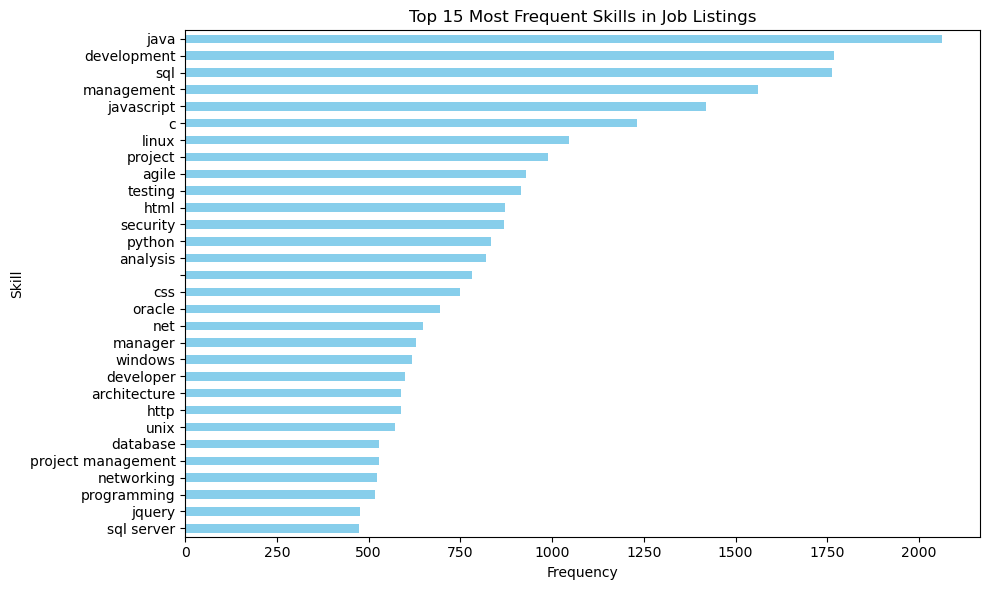

In [608]:
# Plot top 15 skills; visualize
skill_counts.head(30).plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Most Frequent Skills in Job Listings")
plt.xlabel("Frequency")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

In [609]:
#Group by Job Title and Count Skills
job_data_cleaned.explode('skills_cleaned').groupby('jobtitle')['skills_cleaned'].value_counts().head(20)

jobtitle                                                                                       skills_cleaned                                                                                     
"ATG Developer"                                                                                atg                                                                                                    1
"BPM Business Analyst OR Project Manager"                                                      agile                                                                                                  1
                                                                                               bpmbusiness process manangement                                                                        1
                                                                                               change management                                                                                      1
     

In [610]:
# Filter rows where jobtitle includes "Data Analyst": Analyze One Job Title
analyst_jobs = job_data_cleaned[job_data_cleaned['jobtitle'].str.contains("Data Analyst", case=False, na=False)]

# Explode skills
analyst_skills = analyst_jobs.explode('skills_cleaned')

# Count top skills
analyst_skill_counts = analyst_skills['skills_cleaned'].value_counts()
analyst_skill_counts.head(10)


skills_cleaned
sql              63
data analyst     32
excel            30
data analysis    26
analyst          18
sas              17
tableau          15
etl              13
analysis         11
python           11
Name: count, dtype: int64

In [611]:
# Filter rows where jobtitle includes java developer
analyst_jobs = job_data_cleaned[job_data_cleaned['jobtitle'].str.contains("Java Developer", case=False, na=False)]

# Explode skills
analyst_skills = analyst_jobs.explode('skills_cleaned')

# Count top skills
analyst_skill_counts = analyst_skills['skills_cleaned'].value_counts()
print(analyst_skill_counts.head(10))


skills_cleaned
java            347
spring          165
j2ee            117
hibernate        95
javascript       90
sql              88
core java        66
oracle           51
agile            42
web services     40
Name: count, dtype: int64


In [612]:
#Create Knowledge Base — Job Title -> Top 5 Skills
# Create an empty dictionary
jobtitle_to_skills = {}

# Loop through each unique job title
for title in job_data_cleaned['jobtitle'].dropna().unique():
    # Filter rows for this title
    subset = job_data_cleaned[job_data_cleaned['jobtitle'] == title]
    subset_exploded = subset.explode('skills_cleaned')
    
    # Count skills and get top 5
    top_skills = subset_exploded['skills_cleaned'].value_counts().head(5).index.tolist()
    
    # Add to dictionary
    jobtitle_to_skills[title] = top_skills


In [613]:
for title, skills in list(jobtitle_to_skills.items())[:5]:
    print(f"{title}: {skills}")


AUTOMATION TEST ENGINEER: ['see below']
Information Security Engineer: ['information security', 'security', 'linux', 'management', 'cissp']
Business Solutions Architect: ['enterprise solutions architecture', 'reporting', 'reports', 'business inteligence', 'lending mortgage background preferred']
Java Developer (mid level)- FT- GREAT culture, modern technologies, career growth: ['please see job description']
DevOps Engineer: ['devops', 'linux', 'python', 'aws', 'java']
